In [1]:
!pip install pillow matplotlib torchvision tqdm

Exploring FER2013 Dataset...

TRAIN Split Statistics:
------------------------------
angry       : 3995 images
disgust     :  436 images
fear        : 4097 images
happy       : 7215 images
neutral     : 4965 images
sad         : 4830 images
surprise    : 3171 images
Total       : 28709 images

TEST Split Statistics:
------------------------------
angry       :  958 images
disgust     :  111 images
fear        : 1024 images
happy       : 1774 images
neutral     : 1233 images
sad         : 1247 images
surprise    :  831 images
Total       : 7178 images

Visualizing sample images...


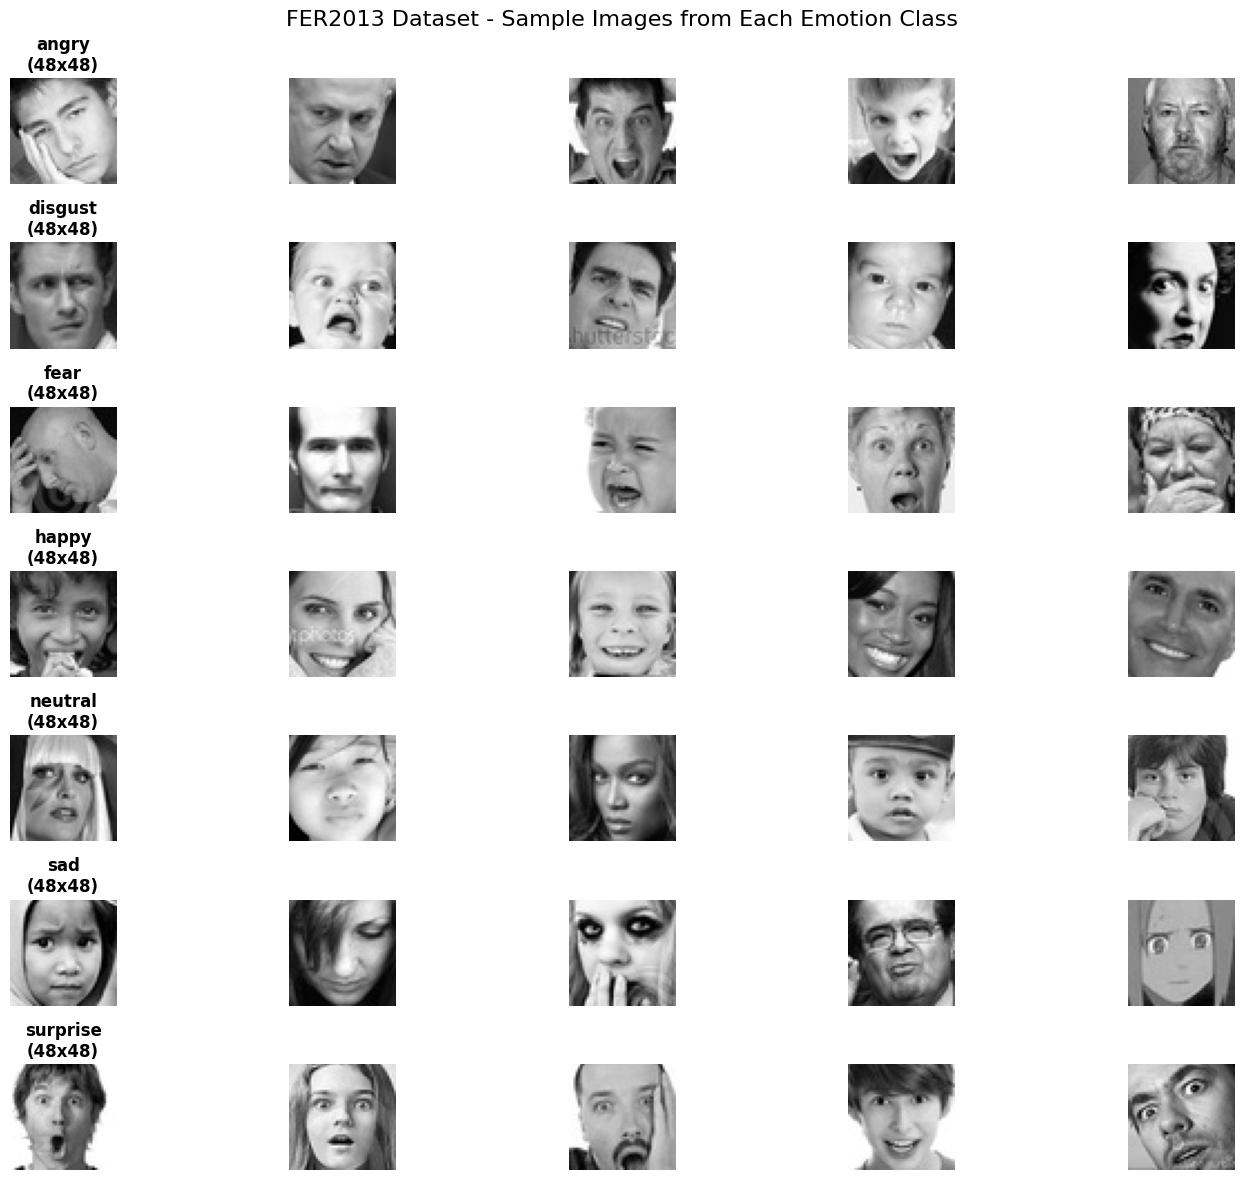


Found 7 emotion classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Set the path to your dataset
dataset_path = r"C:\Users\Admin\emod\data\fer2013"

def explore_dataset(dataset_path, num_samples=5):
    """
    Explore the FER2013 dataset by displaying random samples from each emotion class
    """
    # Define emotion classes based on folder names
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    # Create a figure for visualization
    fig, axes = plt.subplots(len(emotions), num_samples, figsize=(15, 12))
    fig.suptitle('FER2013 Dataset - Sample Images from Each Emotion Class', fontsize=16)
    
    for i, emotion in enumerate(emotions):
        # Construct path to train folder for this emotion
        emotion_path = os.path.join(dataset_path, 'train', emotion)
        
        # Check if path exists
        if not os.path.exists(emotion_path):
            print(f"Warning: Path {emotion_path} does not exist")
            continue
            
        # Get all image files in the emotion folder
        image_files = [f for f in os.listdir(emotion_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Randomly select samples
        if len(image_files) >= num_samples:
            selected_files = random.sample(image_files, num_samples)
        else:
            selected_files = image_files
            print(f"Warning: Only {len(image_files)} images found for {emotion}")
        
        # Display each sample
        for j, image_file in enumerate(selected_files):
            if j < num_samples:  # Ensure we don't exceed subplot columns
                img_path = os.path.join(emotion_path, image_file)
                
                # Load and display image
                img = Image.open(img_path)
                ax = axes[i, j] if num_samples > 1 else axes[i]
                ax.imshow(img, cmap='gray' if img.mode == 'L' else None)
                ax.axis('off')
                
                # Only show emotion label for first image in row
                if j == 0:
                    ax.set_title(f"{emotion}\n({img.size[0]}x{img.size[1]})", 
                                fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return emotions

def get_dataset_stats(dataset_path):
    """
    Get basic statistics about the dataset
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    stats = {}
    
    for split in ['train', 'test']:
        stats[split] = {}
        print(f"\n{split.upper()} Split Statistics:")
        print("-" * 30)
        
        total_images = 0
        for emotion in emotions:
            emotion_path = os.path.join(dataset_path, split, emotion)
            if os.path.exists(emotion_path):
                num_images = len([f for f in os.listdir(emotion_path) 
                                if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                stats[split][emotion] = num_images
                total_images += num_images
                print(f"{emotion:12}: {num_images:4} images")
            else:
                stats[split][emotion] = 0
                print(f"{emotion:12}: Folder not found")
        
        print(f"{'Total':12}: {total_images:4} images")
    
    return stats

# Main execution
if __name__ == "__main__":
    # Check if dataset path exists
    if not os.path.exists(dataset_path):
        print(f"Dataset path {dataset_path} does not exist!")
        print("Please check the path and try again.")
    else:
        print("Exploring FER2013 Dataset...")
        
        # Get dataset statistics
        stats = get_dataset_stats(dataset_path)
        
        # Visualize sample images
        print("\nVisualizing sample images...")
        emotions = explore_dataset(dataset_path, num_samples=5)
        
        print(f"\nFound {len(emotions)} emotion classes: {emotions}")

Creating dataset visualizations...


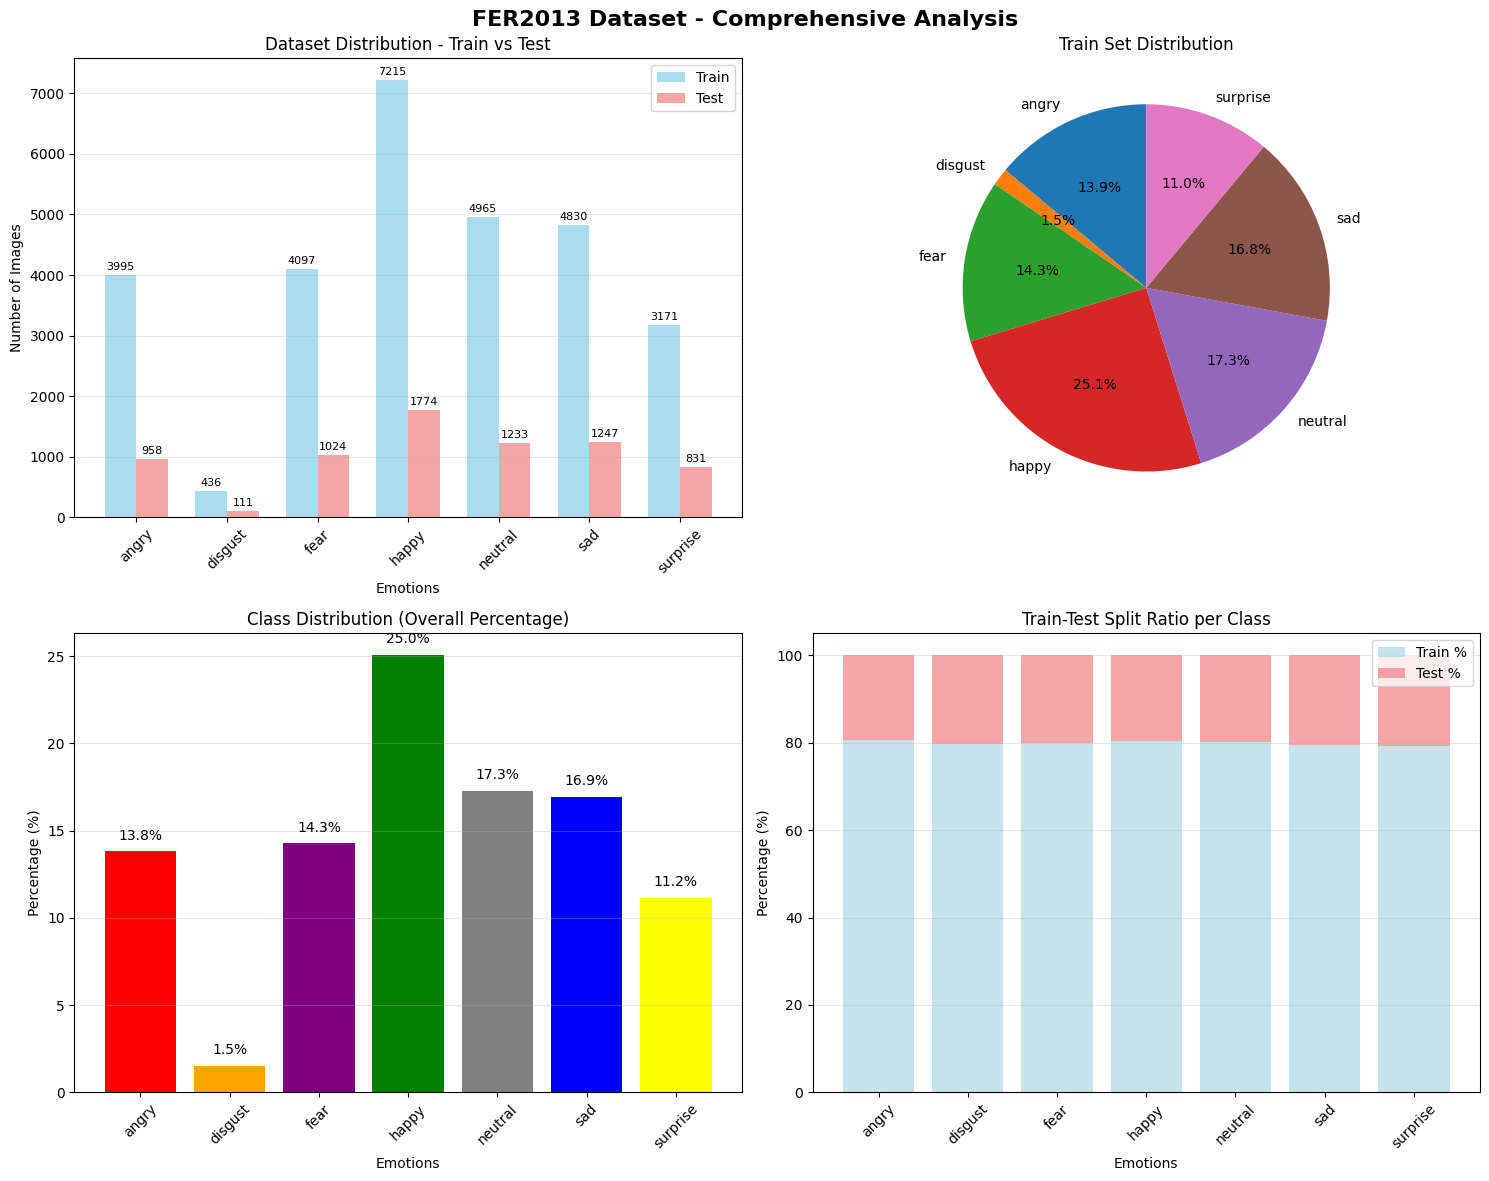


CLASS IMBALANCE ANALYSIS
Emotion      Train    Test     Total    % of Total   Imbalance Factor
----------------------------------------------------------------------
angry        3995     958      4953     13.8         9.1            x
disgust      436      111      547      1.5          1.0            x
fear         4097     1024     5121     14.3         9.4            x
happy        7215     1774     8989     25.0         16.4           x
neutral      4965     1233     6198     17.3         11.3           x
sad          4830     1247     6077     16.9         11.1           x
surprise     3171     831      4002     11.2         7.3            x

Most frequent class: happy (8989 images)
Least frequent class: disgust (547 images)
Imbalance ratio (max/min): 16.4x

Dataset is IMBALANCED (using 0.5 ratio threshold)

IMAGE PROPERTIES ANALYSIS
Emotion      Avg Width    Avg Height   Common Mode 
--------------------------------------------------
angry        48.0         48.0         L    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict
from PIL import Image
import os

def plot_dataset_distribution(stats):
    """
    Create visualizations to understand dataset distribution and characteristics
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('FER2013 Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # 1. Bar plot - Train vs Test distribution
    train_counts = [stats['train'][emotion] for emotion in emotions]
    test_counts = [stats['test'][emotion] for emotion in emotions]
    
    x = np.arange(len(emotions))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, train_counts, width, label='Train', alpha=0.7, color='skyblue')
    axes[0, 0].bar(x + width/2, test_counts, width, label='Test', alpha=0.7, color='lightcoral')
    axes[0, 0].set_title('Dataset Distribution - Train vs Test')
    axes[0, 0].set_xlabel('Emotions')
    axes[0, 0].set_ylabel('Number of Images')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(emotions, rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(train_counts):
        axes[0, 0].text(i - width/2, v + 50, str(v), ha='center', va='bottom', fontsize=8)
    for i, v in enumerate(test_counts):
        axes[0, 0].text(i + width/2, v + 50, str(v), ha='center', va='bottom', fontsize=8)
    
    # 2. Pie chart - Train set distribution
    axes[0, 1].pie(train_counts, labels=emotions, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Train Set Distribution')
    
    # 3. Class imbalance analysis
    total_counts = [train_counts[i] + test_counts[i] for i in range(len(emotions))]
    percentages = [count/sum(total_counts)*100 for count in total_counts]
    
    colors = ['red', 'orange', 'purple', 'green', 'gray', 'blue', 'yellow']
    bars = axes[1, 0].bar(emotions, percentages, color=colors)
    axes[1, 0].set_title('Class Distribution (Overall Percentage)')
    axes[1, 0].set_xlabel('Emotions')
    axes[1, 0].set_ylabel('Percentage (%)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add percentage labels on bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # 4. Train-Test ratio per class
    train_ratios = [stats['train'][emotion]/(stats['train'][emotion] + stats['test'][emotion])*100 
                   for emotion in emotions]
    test_ratios = [stats['test'][emotion]/(stats['train'][emotion] + stats['test'][emotion])*100 
                  for emotion in emotions]
    
    axes[1, 1].bar(emotions, train_ratios, label='Train %', alpha=0.7, color='lightblue')
    axes[1, 1].bar(emotions, test_ratios, bottom=train_ratios, label='Test %', alpha=0.7, color='lightcoral')
    axes[1, 1].set_title('Train-Test Split Ratio per Class')
    axes[1, 1].set_xlabel('Emotions')
    axes[1, 1].set_ylabel('Percentage (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return total_counts, percentages

def analyze_class_imbalance(stats):
    """
    Analyze and print class imbalance information
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    print("\n" + "="*50)
    print("CLASS IMBALANCE ANALYSIS")
    print("="*50)
    
    # Calculate total per class
    total_per_class = {}
    for emotion in emotions:
        total_per_class[emotion] = stats['train'][emotion] + stats['test'][emotion]
    
    total_images = sum(total_per_class.values())
    
    print(f"{'Emotion':<12} {'Train':<8} {'Test':<8} {'Total':<8} {'% of Total':<12} {'Imbalance Factor'}")
    print("-" * 70)
    
    max_count = max(total_per_class.values())
    min_count = min(total_per_class.values())
    
    for emotion in emotions:
        total = total_per_class[emotion]
        percentage = (total / total_images) * 100
        imbalance_factor = total / min_count  # How many times larger than smallest class
        
        print(f"{emotion:<12} {stats['train'][emotion]:<8} {stats['test'][emotion]:<8} "
              f"{total:<8} {percentage:<12.1f} {imbalance_factor:<15.1f}x")
    
    print(f"\nMost frequent class: {max(total_per_class, key=total_per_class.get)} "
          f"({max_count} images)")
    print(f"Least frequent class: {min(total_per_class, key=total_per_class.get)} "
          f"({min_count} images)")
    print(f"Imbalance ratio (max/min): {max_count/min_count:.1f}x")
    
    # Check if dataset is balanced (common threshold: no class < 50% of max)
    is_balanced = min_count > (max_count * 0.5)
    print(f"\nDataset is {'BALANCED' if is_balanced else 'IMBALANCED'} "
          f"(using 0.5 ratio threshold)")

def check_image_properties(dataset_path, sample_size=20):
    """
    Check image dimensions and properties across different classes
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    print(f"\n" + "="*50)
    print("IMAGE PROPERTIES ANALYSIS")
    print("="*50)
    
    image_sizes = defaultdict(list)
    color_modes = defaultdict(list)
    
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, 'train', emotion)
        if os.path.exists(emotion_path):
            image_files = [f for f in os.listdir(emotion_path) 
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            # Sample random images
            if len(image_files) > sample_size:
                sampled_files = random.sample(image_files, sample_size)
            else:
                sampled_files = image_files
            
            for image_file in sampled_files:
                img_path = os.path.join(emotion_path, image_file)
                try:
                    with Image.open(img_path) as img:
                        image_sizes[emotion].append(img.size)
                        color_modes[emotion].append(img.mode)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")
    
    # Print summary
    print(f"{'Emotion':<12} {'Avg Width':<12} {'Avg Height':<12} {'Common Mode':<12}")
    print("-" * 50)
    
    for emotion in emotions:
        if emotion in image_sizes and image_sizes[emotion]:
            avg_width = np.mean([size[0] for size in image_sizes[emotion]])
            avg_height = np.mean([size[1] for size in image_sizes[emotion]])
            common_mode = max(set(color_modes[emotion]), key=color_modes[emotion].count)
            
            print(f"{emotion:<12} {avg_width:<12.1f} {avg_height:<12.1f} {common_mode:<12}")
        else:
            print(f"{emotion:<12} {'N/A':<12} {'N/A':<12} {'N/A':<12}")

# Main execution
if __name__ == "__main__":
    # Dataset path
    dataset_path = r"C:\Users\Admin\emod\data\fer2013"
    
    # Use the stats from previous step
    stats = {
        'train': {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 
                 'neutral': 4965, 'sad': 4830, 'surprise': 3171},
        'test': {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 
                'neutral': 1233, 'sad': 1247, 'surprise': 831}
    }
    
    # Create comprehensive visualizations
    print("Creating dataset visualizations...")
    total_counts, percentages = plot_dataset_distribution(stats)
    
    # Analyze class imbalance
    analyze_class_imbalance(stats)
    
    # Check image properties
    check_image_properties(dataset_path)

In [ ]:
------------------CUSTOME CNN

Starting training...
Epoch  1 | Train: 0.176 | Test: 0.212
Epoch  2 | Train: 0.242 | Test: 0.326
Epoch  3 | Train: 0.299 | Test: 0.363
Epoch  4 | Train: 0.381 | Test: 0.439
Epoch  5 | Train: 0.416 | Test: 0.429
Epoch 11 | Train: 0.516 | Test: 0.526
Epoch 21 | Train: 0.575 | Test: 0.528
Epoch 31 | Train: 0.608 | Test: 0.606
Epoch 41 | Train: 0.632 | Test: 0.615
Epoch 51 | Train: 0.663 | Test: 0.638
Epoch 61 | Train: 0.689 | Test: 0.640

FINAL RESULTS
BEST TEST ACCURACY: 0.644 (64.4%)
FINAL TEST ACCURACY: 0.643
FINAL TRAIN ACCURACY: 0.693

TEST REPORT:
              precision    recall  f1-score   support

       angry       0.54      0.63      0.58       958
     disgust       0.76      0.59      0.66       111
        fear       0.48      0.39      0.43      1024
       happy       0.84      0.84      0.84      1774
     neutral       0.60      0.62      0.61      1233
         sad       0.51      0.50      0.51      1247
    surprise       0.76      0.80      0.78       831

    accur

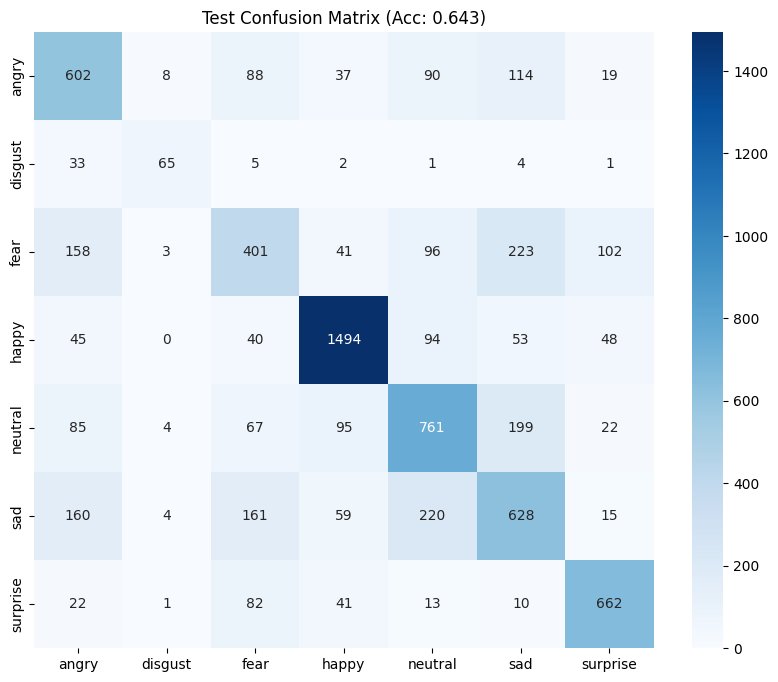

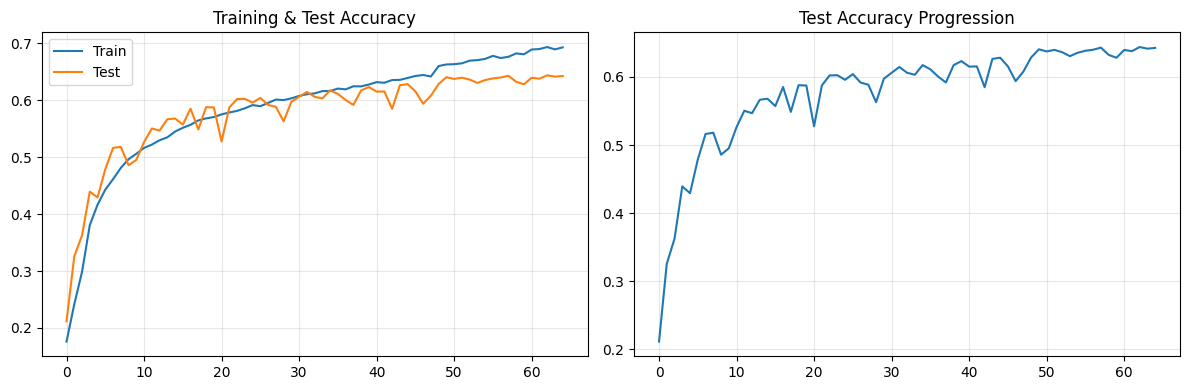

Model saved: C:\Users\Admin\emod\models/best_emotion_cnn_v2.pth


In [14]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from pathlib import Path
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Paths
DATA_PATH = Path(r"C:\Users\Admin\emod\data\fer2013")
MODELS_PATH = Path(r"C:\Users\Admin\emod\models")
MODELS_PATH.mkdir(parents=True, exist_ok=True)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Proven 64.2% CNN Architecture
class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128, 64), nn.ReLU(), nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.global_pool(x).flatten(1)
        x = self.classifier(x)
        return x

# Stable transforms
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

def get_class_weights(dataset):
    class_counts = Counter()
    for _, label in dataset:
        class_counts[label] += 1
    total = len(dataset)
    n_classes = len(class_counts)
    weights = [total / (n_classes * class_counts[i]) for i in range(7)]
    return torch.FloatTensor(weights)

def train_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Load datasets
    train_dataset = ImageFolder(DATA_PATH / 'train', transform=train_transform)
    test_dataset = ImageFolder(DATA_PATH / 'test', transform=test_transform)
    
    class_weights = get_class_weights(train_dataset)
    
    # FIXED: num_workers=0 eliminates multiprocessing warning
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)
    
    model = EmotionCNN(num_classes=7).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
    
    # FIXED: Removed verbose=True parameter
    scheduler = ReduceLROnPlateau(optimizer, patience=7, factor=0.5)
    
    best_test_acc = 0
    train_accs, test_accs = [], []
    
    print("Starting training...")
    
    for epoch in range(65):
        # Training
        model.train()
        train_loss, train_correct = 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = train_correct / len(train_dataset)
        train_accs.append(train_acc)
        
        # Testing
        model.eval()
        test_loss, test_correct = 0, 0
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for imgs, labels in test_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item()
                preds = outputs.argmax(1)
                test_correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_acc = test_correct / len(test_dataset)
        test_accs.append(test_acc)
        
        # FIXED: Correct scheduler.step() usage
        avg_test_loss = test_loss / len(test_loader)
        scheduler.step(avg_test_loss)
        
        if epoch % 10 == 0 or epoch < 5:
            print(f"Epoch {epoch+1:2d} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")
        
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({
                'model_state_dict': model.state_dict(),
                'train_acc': train_acc,
                'test_acc': test_acc,
                'epoch': epoch,
                'class_weights': class_weights
            }, MODELS_PATH / 'best_emotion_cnn_v2.pth')
    
    print("\nFINAL RESULTS")
    print(f"BEST TEST ACCURACY: {best_test_acc:.3f} ({best_test_acc*100:.1f}%)")
    print(f"FINAL TEST ACCURACY: {test_accs[-1]:.3f}")
    print(f"FINAL TRAIN ACCURACY: {train_accs[-1]:.3f}")
    
    print("\nTEST REPORT:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Test Confusion Matrix (Acc: {test_acc:.3f})')
    plt.savefig(MODELS_PATH / 'confusion_matrix_v2.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train')
    plt.plot(test_accs, label='Test')
    plt.title('Training & Test Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accs)
    plt.title('Test Accuracy Progression')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(MODELS_PATH / 'training_curves_v2.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    metrics = {
        'best_test_acc': best_test_acc,
        'final_train_acc': train_accs[-1],
        'final_test_acc': test_accs[-1],
        'train_history': train_accs,
        'test_history': test_accs
    }
    torch.save(metrics, MODELS_PATH / 'training_metrics_v2.pth')
    
    print(f"Model saved: {MODELS_PATH}/best_emotion_cnn_v2.pth")

if __name__ == "__main__":
    train_model()


In [ ]:
----------------------Mobilenet

Using device: cuda
Train: 28709 images, Test: 7178 images
Class weights: [1.03 9.41 1.   0.57 0.83 0.85 1.29]


C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Starting MobileNetV3-Small Training (40 epochs)...
------------------------------------------------------------
Epoch  1 | Train: 0.507 | Test: 0.545 | LR: 1.0e-03
Epoch  2 | Train: 0.592 | Test: 0.598 | LR: 1.0e-03
Epoch  3 | Train: 0.618 | Test: 0.593 | LR: 1.0e-03
Epoch  6 | Train: 0.676 | Test: 0.607 | LR: 1.0e-03
Epoch 11 | Train: 0.748 | Test: 0.663 | LR: 1.0e-03
Epoch 16 | Train: 0.853 | Test: 0.687 | LR: 5.0e-04
Epoch 21 | Train: 0.915 | Test: 0.676 | LR: 2.5e-04
Epoch 26 | Train: 0.959 | Test: 0.689 | LR: 2.5e-04
Epoch 31 | Train: 0.978 | Test: 0.688 | LR: 1.3e-04
Epoch 36 | Train: 0.984 | Test: 0.695 | LR: 6.3e-05

MOBILENETV3-SMALL FINAL RESULTS
BEST TEST ACCURACY: 0.698 (69.8%)
FINAL TEST ACCURACY: 0.698 (69.8%)

DETAILED TEST REPORT:
              precision    recall  f1-score   support

       angry       0.62      0.64      0.63       958
     disgust       0.77      0.68      0.72       111
        fear       0.59      0.53      0.56      1024
       happy       0.87  

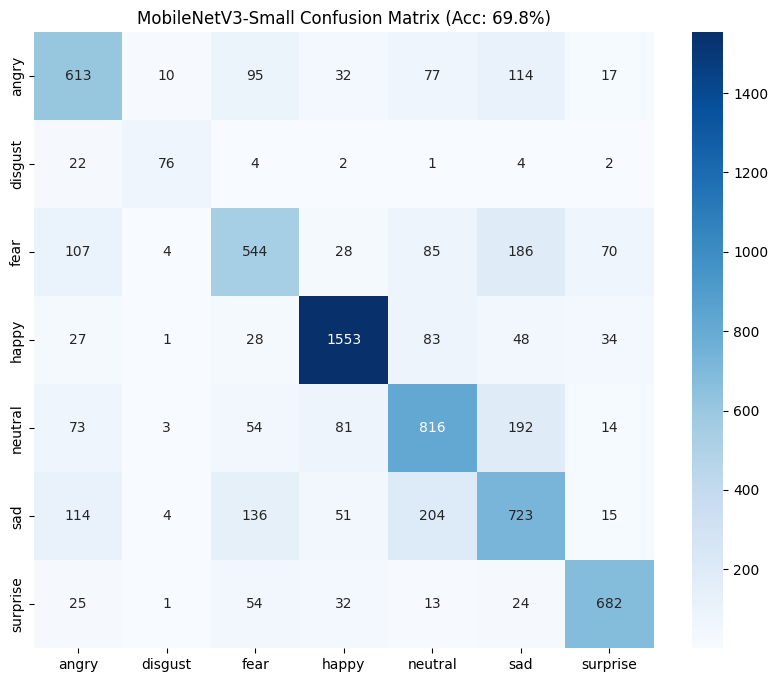

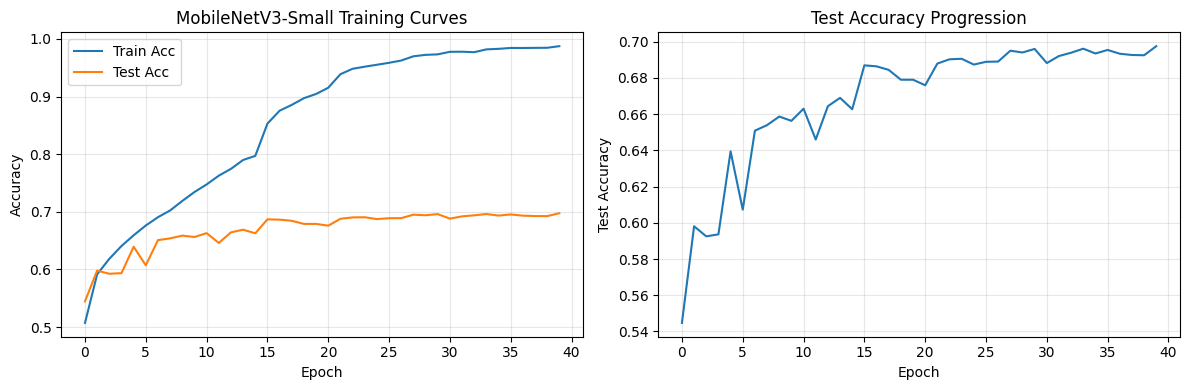


✅ Model saved: C:\Users\Admin\emod\models/best_mobilenetv3_small.pth
✅ Metrics saved: mobilenetv3_metrics.pth
MobileNetV3-Small Training COMPLETE!


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v3_small
from pathlib import Path
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Paths
DATA_PATH = Path(r"C:\Users\Admin\emod\data\fer2013")
MODELS_PATH = Path(r"C:\Users\Admin\emod\models")
MODELS_PATH.mkdir(parents=True, exist_ok=True)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# MobileNetV3-specific transforms (224x224 input)
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # MobileNet expects 3 channels
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_class_weights(dataset):
    class_counts = Counter()
    for _, label in dataset:
        class_counts[label] += 1
    total = len(dataset)
    n_classes = len(class_counts)
    weights = [total / (n_classes * class_counts[i]) for i in range(7)]
    return torch.FloatTensor(weights)

# MobileNetV3-Small for FER2013
class MobileNetFER(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        base_model = mobilenet_v3_small(pretrained=True)
        
        # Replace classifier head
        self.features = base_model.features
        self.avgpool = base_model.avgpool
        self.classifier = nn.Sequential(
            base_model.classifier[0],  # hswish
            base_model.classifier[1],  # dropout
            nn.Linear(base_model.classifier[3].in_features, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

def train_mobilenet():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Datasets
    train_dataset = ImageFolder(DATA_PATH / 'train', transform=train_transform)
    test_dataset = ImageFolder(DATA_PATH / 'test', transform=test_transform)
    class_weights = get_class_weights(train_dataset)
    
    print(f"Train: {len(train_dataset)} images, Test: {len(test_dataset)} images")
    print(f"Class weights: {class_weights.numpy().round(2)}")
    
    # Dataloaders (smaller batch for 224x224)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    # Model
    model = MobileNetFER(num_classes=7).to(device)
    
    # Freeze early layers (transfer learning)
    for param in model.features[:6].parameters():
        param.requires_grad = False
    
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
    scheduler = ReduceLROnPlateau(optimizer, patience=5, factor=0.5)
    
    best_test_acc = 0
    train_accs, test_accs = [], []
    
    print("\nStarting MobileNetV3-Small Training (40 epochs)...")
    print("-" * 60)
    
    for epoch in range(40):
        # Training
        model.train()
        train_loss, train_correct = 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = train_correct / len(train_dataset)
        train_accs.append(train_acc)
        
        # Testing
        model.eval()
        test_loss, test_correct = 0, 0
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for imgs, labels in test_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item()
                preds = outputs.argmax(1)
                test_correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_acc = test_correct / len(test_dataset)
        test_accs.append(test_acc)
        
        avg_test_loss = test_loss / len(test_loader)
        scheduler.step(avg_test_loss)
        
        if epoch % 5 == 0 or epoch < 3:
            print(f"Epoch {epoch+1:2d} | Train: {train_acc:.3f} | Test: {test_acc:.3f} | LR: {optimizer.param_groups[0]['lr']:.1e}")
        
        # Save best model
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({
                'model_state_dict': model.state_dict(),
                'train_acc': train_acc,
                'test_acc': test_acc,
                'epoch': epoch,
                'class_weights': class_weights
            }, MODELS_PATH / 'best_mobilenetv3_small.pth')
    
    # Final results
    print("\n" + "="*60)
    print("MOBILENETV3-SMALL FINAL RESULTS")
    print(f"BEST TEST ACCURACY: {best_test_acc:.3f} ({best_test_acc*100:.1f}%)")
    print(f"FINAL TEST ACCURACY: {test_accs[-1]:.3f} ({test_accs[-1]*100:.1f}%)")
    print("="*60)
    
    # Detailed report
    print("\nDETAILED TEST REPORT:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'MobileNetV3-Small Confusion Matrix (Acc: {test_acc:.1%})')
    plt.savefig(MODELS_PATH / 'mobilenetv3_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.title('MobileNetV3-Small Training Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accs)
    plt.title('Test Accuracy Progression')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(MODELS_PATH / 'mobilenetv3_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save metrics
    metrics = {
        'model_name': 'MobileNetV3-Small',
        'best_test_acc': best_test_acc,
        'final_train_acc': train_accs[-1],
        'final_test_acc': test_accs[-1],
        'train_history': train_accs,
        'test_history': test_accs
    }
    torch.save(metrics, MODELS_PATH / 'mobilenetv3_metrics.pth')
    
    print(f"\n✅ Model saved: {MODELS_PATH}/best_mobilenetv3_small.pth")
    print("✅ Metrics saved: mobilenetv3_metrics.pth")
    print("MobileNetV3-Small Training COMPLETE!")

if __name__ == "__main__":
    train_mobilenet()


In [ ]:
---------------EFFICIENTNET

Using device: cuda
Train: 28709 images, Test: 7178 images
Class weights: [1.03 9.41 1.   0.57 0.83 0.85 1.29]

Starting EfficientNet-B0 Training (45 epochs)...
------------------------------------------------------------
Epoch  1 | Train: 0.515 | Test: 0.597 | LR: 5.0e-04
Epoch  2 | Train: 0.597 | Test: 0.620 | LR: 5.0e-04
Epoch  3 | Train: 0.631 | Test: 0.648 | LR: 5.0e-04
Epoch  6 | Train: 0.696 | Test: 0.672 | LR: 5.0e-04
Epoch 11 | Train: 0.782 | Test: 0.681 | LR: 5.0e-04
Epoch 16 | Train: 0.902 | Test: 0.699 | LR: 2.5e-04
Epoch 21 | Train: 0.955 | Test: 0.707 | LR: 1.3e-04
Epoch 26 | Train: 0.967 | Test: 0.703 | LR: 6.3e-05
Epoch 31 | Train: 0.979 | Test: 0.703 | LR: 6.3e-05
Epoch 36 | Train: 0.984 | Test: 0.708 | LR: 3.1e-05
Epoch 41 | Train: 0.988 | Test: 0.710 | LR: 1.6e-05

EFFICIENTNET-B0 FINAL RESULTS
BEST TEST ACCURACY: 0.713 (71.3%)
FINAL TEST ACCURACY: 0.709 (70.9%)

DETAILED TEST REPORT:
              precision    recall  f1-score   support

       angry       0.66      

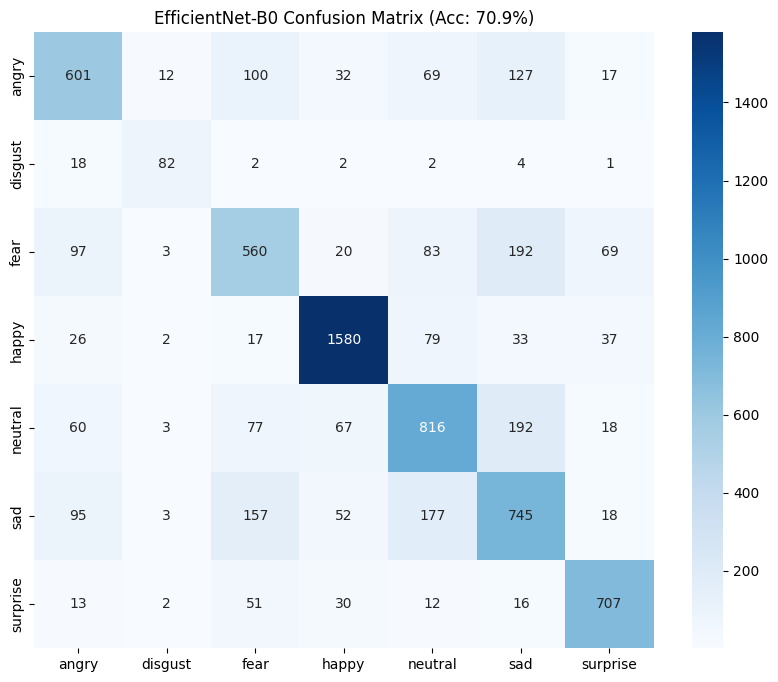

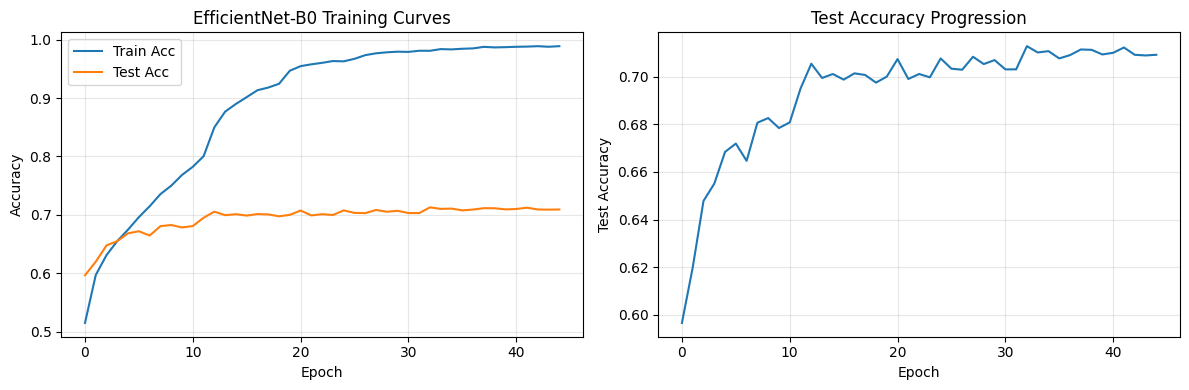


 Model saved: C:\Users\Admin\emod\models/best_efficientnet_b0.pth
 Metrics saved: efficientnet_b0_metrics.pth
EfficientNet-B0 Training COMPLETE!


In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import efficientnet_b0
from pathlib import Path
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Paths
DATA_PATH = Path(r"C:\Users\Admin\emod\data\fer2013")
MODELS_PATH = Path(r"C:\Users\Admin\emod\models")
MODELS_PATH.mkdir(parents=True, exist_ok=True)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# EfficientNet-B0 transforms (224x224, 3 channels)
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((240, 240)),  # EfficientNet-B0 optimal
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_class_weights(dataset):
    class_counts = Counter()
    for _, label in dataset:
        class_counts[label] += 1
    total = len(dataset)
    n_classes = len(class_counts)
    weights = [total / (n_classes * class_counts[i]) for i in range(7)]
    return torch.FloatTensor(weights)

# EfficientNet-B0 for FER2013
class EfficientNetFER(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        base_model = efficientnet_b0(weights='IMAGENET1K_V1')  # Fixed deprecated warning
        
        # Replace classifier
        self.features = base_model.features
        self.avgpool = base_model.avgpool
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(base_model.classifier[1].in_features, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

def train_efficientnet():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Datasets
    train_dataset = ImageFolder(DATA_PATH / 'train', transform=train_transform)
    test_dataset = ImageFolder(DATA_PATH / 'test', transform=test_transform)
    class_weights = get_class_weights(train_dataset)
    
    print(f"Train: {len(train_dataset)} images, Test: {len(test_dataset)} images")
    print(f"Class weights: {class_weights.numpy().round(2)}")
    
    # Dataloaders (smaller batch for EfficientNet)
    train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False, num_workers=0)
    
    # Model
    model = EfficientNetFER(num_classes=7).to(device)
    
    # Freeze early layers (transfer learning)
    for param in model.features[:4].parameters():  # Freeze first 4 blocks
        param.requires_grad = False
    
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-4)
    scheduler = ReduceLROnPlateau(optimizer, patience=6, factor=0.5)
    
    best_test_acc = 0
    train_accs, test_accs = [], []
    
    print("\nStarting EfficientNet-B0 Training (45 epochs)...")
    print("-" * 60)
    
    for epoch in range(45):
        # Training
        model.train()
        train_loss, train_correct = 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = train_correct / len(train_dataset)
        train_accs.append(train_acc)
        
        # Testing
        model.eval()
        test_loss, test_correct = 0, 0
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for imgs, labels in test_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item()
                preds = outputs.argmax(1)
                test_correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_acc = test_correct / len(test_dataset)
        test_accs.append(test_acc)
        
        avg_test_loss = test_loss / len(test_loader)
        scheduler.step(avg_test_loss)
        
        if epoch % 5 == 0 or epoch < 3:
            print(f"Epoch {epoch+1:2d} | Train: {train_acc:.3f} | Test: {test_acc:.3f} | LR: {optimizer.param_groups[0]['lr']:.1e}")
        
        # Save best model
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({
                'model_state_dict': model.state_dict(),
                'train_acc': train_acc,
                'test_acc': test_acc,
                'epoch': epoch,
                'class_weights': class_weights
            }, MODELS_PATH / 'best_efficientnet_b0.pth')
    
    # Final results
    print("\n" + "="*60)
    print("EFFICIENTNET-B0 FINAL RESULTS")
    print(f"BEST TEST ACCURACY: {best_test_acc:.3f} ({best_test_acc*100:.1f}%)")
    print(f"FINAL TEST ACCURACY: {test_accs[-1]:.3f} ({test_accs[-1]*100:.1f}%)")
    print("="*60)
    
    # Detailed report
    print("\nDETAILED TEST REPORT:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'EfficientNet-B0 Confusion Matrix (Acc: {test_acc:.1%})')
    plt.savefig(MODELS_PATH / 'efficientnet_b0_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.title('EfficientNet-B0 Training Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accs)
    plt.title('Test Accuracy Progression')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(MODELS_PATH / 'efficientnet_b0_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save metrics
    metrics = {
        'model_name': 'EfficientNet-B0',
        'best_test_acc': best_test_acc,
        'final_train_acc': train_accs[-1],
        'final_test_acc': test_accs[-1],
        'train_history': train_accs,
        'test_history': test_accs
    }
    torch.save(metrics, MODELS_PATH / 'efficientnet_b0_metrics.pth')
    
    print(f"\n Model saved: {MODELS_PATH}/best_efficientnet_b0.pth")
    print(" Metrics saved: efficientnet_b0_metrics.pth")
    print("EfficientNet-B0 Training COMPLETE!")

if __name__ == "__main__":
    train_efficientnet()


In [ ]:
---------------------------------------RESNET

Using device: cuda
Train: 28709 images, Test: 7178 images
Class weights: [1.03 9.41 1.   0.57 0.83 0.85 1.29]

Starting ResNet18 Training (40 epochs)...
------------------------------------------------------------
Epoch  1 | Train: 0.480 | Test: 0.542 | LR: 5.0e-04
Epoch  2 | Train: 0.556 | Test: 0.580 | LR: 5.0e-04
Epoch  3 | Train: 0.592 | Test: 0.608 | LR: 5.0e-04
Epoch  6 | Train: 0.655 | Test: 0.631 | LR: 5.0e-04
Epoch 11 | Train: 0.742 | Test: 0.668 | LR: 5.0e-04
Epoch 16 | Train: 0.837 | Test: 0.669 | LR: 2.5e-04
Epoch 21 | Train: 0.936 | Test: 0.680 | LR: 2.5e-04
Epoch 26 | Train: 0.973 | Test: 0.681 | LR: 1.3e-04
Epoch 31 | Train: 0.985 | Test: 0.690 | LR: 6.3e-05
Epoch 36 | Train: 0.989 | Test: 0.689 | LR: 6.3e-05

RESNET18 FINAL RESULTS
BEST TEST ACCURACY: 0.693 (69.3%)
FINAL TEST ACCURACY: 0.693 (69.3%)

DETAILED TEST REPORT:
              precision    recall  f1-score   support

       angry       0.60      0.63      0.62       958
     disgust       0.72      0.66      0.

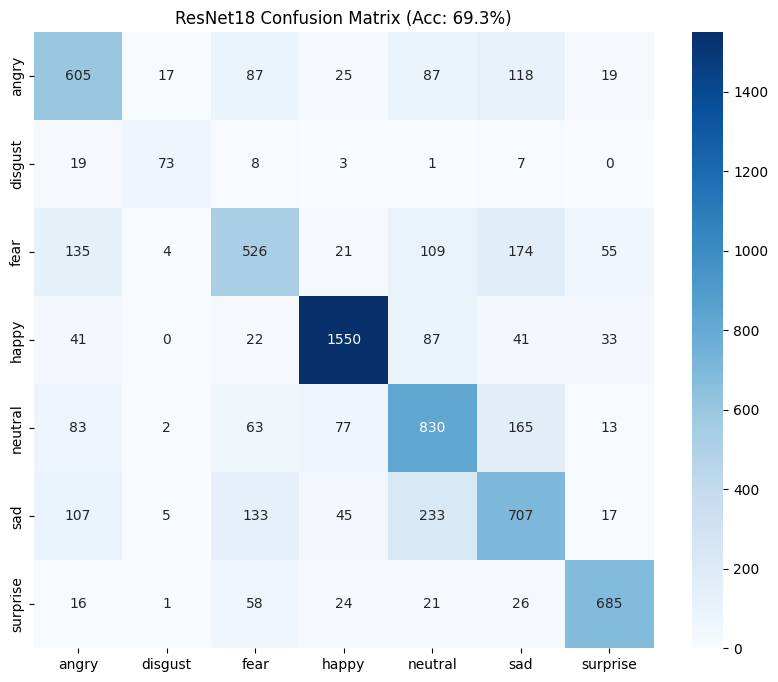

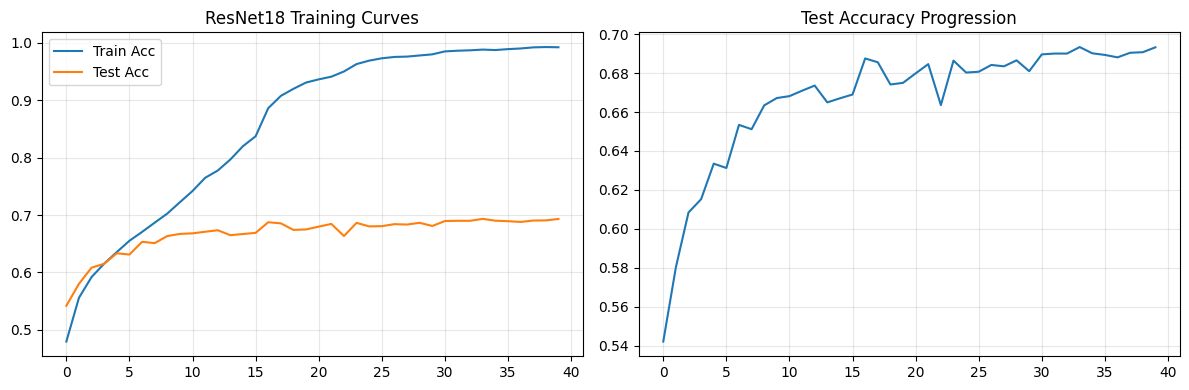


✅ Model saved: C:\Users\Admin\emod\models/best_resnet18.pth
✅ Metrics saved: resnet18_metrics.pth
ResNet18 Training COMPLETE!


In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from pathlib import Path
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Paths
DATA_PATH = Path(r"C:\Users\Admin\emod\data\fer2013")
MODELS_PATH = Path(r"C:\Users\Admin\emod\models")
MODELS_PATH.mkdir(parents=True, exist_ok=True)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ResNet18 transforms (224x224 standard)
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_class_weights(dataset):
    class_counts = Counter()
    for _, label in dataset:
        class_counts[label] += 1
    total = len(dataset)
    n_classes = len(class_counts)
    weights = [total / (n_classes * class_counts[i]) for i in range(7)]
    return torch.FloatTensor(weights)

# ResNet18 for FER2013
class ResNetFER(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        base_model = resnet18(weights='IMAGENET1K_V1')
        
        # Replace final FC layer
        self.features = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(base_model.fc.in_features, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

def train_resnet():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Datasets
    train_dataset = ImageFolder(DATA_PATH / 'train', transform=train_transform)
    test_dataset = ImageFolder(DATA_PATH / 'test', transform=test_transform)
    class_weights = get_class_weights(train_dataset)
    
    print(f"Train: {len(train_dataset)} images, Test: {len(test_dataset)} images")
    print(f"Class weights: {class_weights.numpy().round(2)}")
    
    # Dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    # Model
    model = ResNetFER(num_classes=7).to(device)
    
    # Freeze early layers
    for param in model.features[0:5].parameters():  # Freeze first 5 layers
        param.requires_grad = False
    
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-4)
    scheduler = ReduceLROnPlateau(optimizer, patience=6, factor=0.5)
    
    best_test_acc = 0
    train_accs, test_accs = [], []
    
    print("\nStarting ResNet18 Training (40 epochs)...")
    print("-" * 60)
    
    for epoch in range(40):
        # Training
        model.train()
        train_loss, train_correct = 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = train_correct / len(train_dataset)
        train_accs.append(train_acc)
        
        # Testing
        model.eval()
        test_loss, test_correct = 0, 0
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for imgs, labels in test_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item()
                preds = outputs.argmax(1)
                test_correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_acc = test_correct / len(test_dataset)
        test_accs.append(test_acc)
        
        avg_test_loss = test_loss / len(test_loader)
        scheduler.step(avg_test_loss)
        
        if epoch % 5 == 0 or epoch < 3:
            print(f"Epoch {epoch+1:2d} | Train: {train_acc:.3f} | Test: {test_acc:.3f} | LR: {optimizer.param_groups[0]['lr']:.1e}")
        
        # Save best model
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({
                'model_state_dict': model.state_dict(),
                'train_acc': train_acc,
                'test_acc': test_acc,
                'epoch': epoch,
                'class_weights': class_weights
            }, MODELS_PATH / 'best_resnet18.pth')
    
    # Final results (same format as others)
    print("\n" + "="*60)
    print("RESNET18 FINAL RESULTS")
    print(f"BEST TEST ACCURACY: {best_test_acc:.3f} ({best_test_acc*100:.1f}%)")
    print(f"FINAL TEST ACCURACY: {test_accs[-1]:.3f} ({test_accs[-1]*100:.1f}%)")
    print("="*60)
    
    print("\nDETAILED TEST REPORT:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion Matrix & Curves (same as others)
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'ResNet18 Confusion Matrix (Acc: {test_acc:.1%})')
    plt.savefig(MODELS_PATH / 'resnet18_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.title('ResNet18 Training Curves')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accs)
    plt.title('Test Accuracy Progression')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(MODELS_PATH / 'resnet18_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    metrics = {
        'model_name': 'ResNet18',
        'best_test_acc': best_test_acc,
        'final_train_acc': train_accs[-1],
        'final_test_acc': test_accs[-1],
        'train_history': train_accs,
        'test_history': test_accs
    }
    torch.save(metrics, MODELS_PATH / 'resnet18_metrics.pth')
    
    print(f"\n✅ Model saved: {MODELS_PATH}/best_resnet18.pth")
    print("✅ Metrics saved: resnet18_metrics.pth")
    print("ResNet18 Training COMPLETE!")

if __name__ == "__main__":
    train_resnet()
